### Draw BBox
According to the given dataset, draw bboxes on the images and save them. Also, at the end, the class comparision is available

In [1]:
import json
import cv2
from tqdm import tqdm

In [2]:
ann_path = 'seacoco/all_waterweeds.json' # annotation json
img_path = 'seacoco/trainval/'
save_path = 'seacoco/trainval_with_bbox/' # the path of saveing image with annotated bboxes

In [3]:
with open(ann_path,'r') as f:
    ann = json.load(f)

In [4]:
for ann_img in tqdm(ann['images']):
    img = cv2.imread(img_path + ann_img['file_name'])
    img_id = ann_img['id']
    for ann_ann in ann['annotations']:
        if ann_ann['image_id'] == img_id:
            x1 = ann_ann['bbox'][0]
            y1 = ann_ann['bbox'][1]
            x2 = ann_ann['bbox'][0] + ann_ann['bbox'][2]
            y2 = ann_ann['bbox'][1] + ann_ann['bbox'][3]
            img = cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 8)
    cv2.imwrite(save_path + ann_img['file_name'], img)

100%|██████████| 5543/5543 [08:55<00:00, 10.36it/s]


In [19]:
aug_anns = ann
print("The augmentation image number: %d" % len(aug_anns['images']))
print("The augmentation annotation number: %d" % len(aug_anns['annotations']))
print("")
class_freq_dict = {}

# init class_fre_dict
for cls in aug_anns['categories']:
    class_freq_dict[cls['id']] = 0

# count the instance number of each class
for ann in aug_anns['annotations']:
    class_freq_dict[ann['category_id']] += 1

# print out class frequency
print("The instance number of each class:")
for cls_id in list(class_freq_dict.keys()):
    for cat in aug_anns['categories']:
        if cat['id'] == cls_id:
            print(cat['name'], ': ', class_freq_dict[cls_id])

The augmentation image number: 6060
The augmentation annotation number: 39788

The instance number of each class:
holothurian :  6991
echinus :  20818
scallop :  5653
starfish :  6326


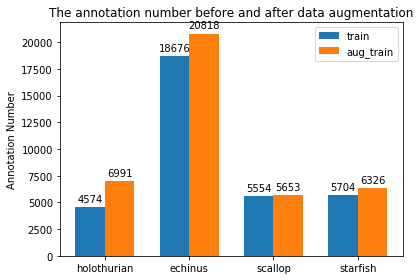

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['holothurian', 'echinus', 'scallop', 'starfish']
train_means = [4574, 18676, 5554, 5704]
aug_train_means = [6991, 20818, 5653, 6326]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_means, width, label='train')
rects2 = ax.bar(x + width/2, aug_train_means, width, label='aug_train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Annotation Number')
ax.set_title('The annotation number before and after data augmentation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()